Importing and Preparing Dataset and Modules

In [42]:
!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1

--2021-08-17 07:03:34--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  4.92MB/s    in 3.8s    

2021-08-17 07:03:40 (4.92 MB/s) - ‘Data.npz’ saved [19725078/19725078]



In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
import numpy as np
data=np.load('Data.npz')
print(data.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [45]:
X_train,X_val,X_test,y_train,y_val,y_test=data['train_images'],data['val_images'],data['test_images'],data['train_labels'],data['val_labels'],data['test_labels']
print('X_train : '+str(X_train.shape))
print('y_train : '+str(y_train.shape))
print('X_val : '+str(X_val.shape))
print('y_val : '+str(y_val.shape))
print('X_test : '+str(X_test.shape))
print('y_test : '+str(y_test.shape))

X_train : (7007, 28, 28, 3)
y_train : (7007, 1)
X_val : (1003, 28, 28, 3)
y_val : (1003, 1)
X_test : (2005, 28, 28, 3)
y_test : (2005, 1)


Checking Class Distribution 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

toc1=to_categorical(y_train)
toc2=to_categorical(y_val)
toc3=to_categorical(y_test)

[  66.  103.  220.   23.  223. 1341.   29.]


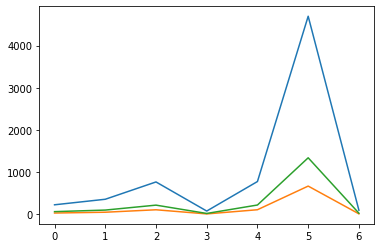

In [ ]:
plt.plot(np.sum(toc1,axis=0))
plt.plot(np.sum(toc2,axis=0))
plt.plot(np.sum(toc3,axis=0))

print(np.sum(toc3,axis=0))


Solving Imbalanced Dataset Issue by Random Over Sampling

In [30]:
from imblearn.over_sampling import RandomOverSampler
sampler=RandomOverSampler()
X_train=X_train.reshape(-1,28*28*3)
X_val=X_val.reshape(-1,28*28*3)
X_train,y_train=sampler.fit_resample(X_train,y_train)
X_val,y_val=sampler.fit_resample(X_val,y_val)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

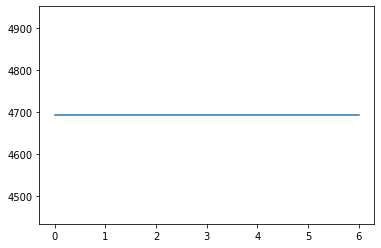

In [ ]:
import matplotlib.pyplot as plt

toc=to_categorical(y_train)
plt.plot(np.sum(toc,axis=0))

In [32]:
X_train=X_train.reshape(-1,28,28,3)
X_val=X_val.reshape(-1,28,28,3)
X_train.shape
X_val.shape

(4697, 28, 28, 3)

Solving Imbalanced Dataset Issue by Random Over Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sampler=RandomUnderSampler()
X_train=X_train.reshape(-1,28*28*3)
X_train,y_train=sampler.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


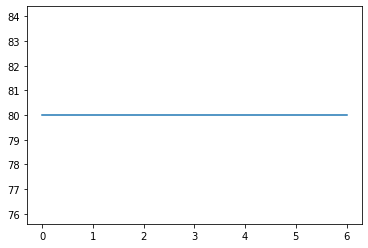

In [ ]:
import matplotlib.pyplot as plt

toc=to_categorical(y_train)
plt.plot(np.sum(toc,axis=0))

In [ ]:
X_train=X_train.reshape(-1,28,28,3)
X_train.shape

(560, 28, 28, 3)

Visualizing Some Data

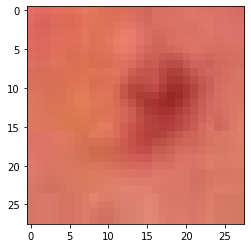

[5]


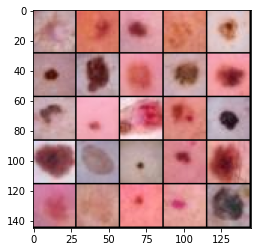

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])
plt.show()
print(y_train[1])
c=0
image_check=np.zeros((29*5,29*5,3))
for i in range(5):
  for j in range(5):
    image_check[i*29:i*29+28,j*29:j*29+28,:]=X_train[c]
    c+=1
plt.imshow(image_check.astype(np.uint8))

Resizing the Images

In [ ]:
import tensorflow as tf

X_train=tf.image.resize(X_train,(224,224))
X_train=np.array(X_train).astype(np.uint8)
X_test=tf.image.resize(X_test,(224,224))
X_test=np.array(X_test).astype(np.uint8)
X_val=tf.image.resize(X_val,(224,224))
X_val=np.array(X_val).astype(np.uint8)

Data Augmentation

In [ ]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
Imgen1=ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         horizontal_flip=True,
                         vertical_flip=True,
                         zoom_range=0.5)
                         #rescale=1./255)
Imgen2=ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         horizontal_flip=True,
                         vertical_flip=True,
                         zoom_range=0.5)
                         #rescale=1./255)
X_test=X_test/255
aug_iter=Imgen1.flow(X_train,y_train,batch_size=32)
aug_iter_val=Imgen2.flow(X_val,y_val,batch_size=32)
#aug_image=[next(aug_iter).astype(np.uint8) for i in range(10)]

Preproccesing

In [46]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [21]:
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

In [7]:
X_train.shape

(7007, 28, 28, 3)

Model

In [47]:

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(28, 28, 3),kernel_regularizer=l2(0.01)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2,2), strides=(2,2)))
#model.add(AveragePooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))



model.add(Conv2D(32, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
#model.add(Conv2D(32, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2,2), strides=(2,2)))
#model.add(AveragePooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
#model.add(Conv2D(64, (3,3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2,2), strides=(2,2)))
#model.add(AveragePooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)         

Training Model

With Augmentation

In [ ]:
model.compile(optimizer=Adam() , loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(aug_iter,steps_per_epoch=int(aug_iter.n/32) , epochs=30,validation_data=aug_iter_val,validation_steps=int(aug_iter_val.n/32))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
218/218 [==============================] - 5s 20ms/step - loss: 6.7353 - acc: 0.6571 - val_loss: 4.9235 - val_acc: 0.6694
Epoch 2/30
218/218 [==============================] - 4s 19ms/step - loss: 4.1629 - acc: 0.6691 - val_loss: 3.6006 - val_acc: 0.6683
Epoch 3/30
218/218 [==============================] - 4s 19ms/step - loss: 3.1448 - acc: 0.6692 - val_loss: 2.7534 - val_acc: 0.6764
Epoch 4/30
218/218 [==============================] - 4s 19ms/step - loss: 2.5024 - acc: 0.6704 - val_loss: 2.2329 - val_acc: 0.6683
Epoch 5/30
218/218 [==============================] - 4s 20ms/step - loss: 2.0885 - acc: 0.6678 - val_loss: 1.9214 - val_acc: 0.6683
Epoch 6/30
218/218 [==============================] - 4s 19ms/step - loss: 1.8024 - acc: 0.6760 - val_loss: 1.6456 - val_acc: 0.6734
Epoch 7/30
218/218 [==============================] - 4s 19ms/step - loss: 1.5900 - acc: 0.6753 - val_loss: 1.5106 - val_acc: 0.6704
Epoch 8/30
218/218 [==============================] - 4s 19ms/step - 

Without Augmentation

In [48]:
model.compile(optimizer=Adam() , loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=32, epochs=80,validation_data=(X_val, y_val))

Epoch 1/80
219/219 [==============================] - 3s 11ms/step - loss: 3.7208 - acc: 0.6601 - val_loss: 2.6972 - val_acc: 0.6690
Epoch 2/80
219/219 [==============================] - 2s 9ms/step - loss: 2.2723 - acc: 0.6729 - val_loss: 1.8981 - val_acc: 0.6899
Epoch 3/80
219/219 [==============================] - 2s 9ms/step - loss: 1.7170 - acc: 0.6783 - val_loss: 1.5060 - val_acc: 0.6849
Epoch 4/80
219/219 [==============================] - 2s 9ms/step - loss: 1.4166 - acc: 0.6806 - val_loss: 1.3236 - val_acc: 0.6919
Epoch 5/80
219/219 [==============================] - 2s 9ms/step - loss: 1.2494 - acc: 0.6840 - val_loss: 1.1407 - val_acc: 0.6849
Epoch 6/80
219/219 [==============================] - 2s 9ms/step - loss: 1.1547 - acc: 0.6817 - val_loss: 1.1314 - val_acc: 0.6979
Epoch 7/80
219/219 [==============================] - 2s 9ms/step - loss: 1.0864 - acc: 0.6855 - val_loss: 1.0124 - val_acc: 0.6750
Epoch 8/80
219/219 [==============================] - 2s 9ms/step - loss: 1

In [49]:
model.evaluate(X_test,y_test) 

63/63 [==============================] - 0s 4ms/step - loss: 0.8362 - acc: 0.7077


[0.8362024426460266, 0.7077306509017944]

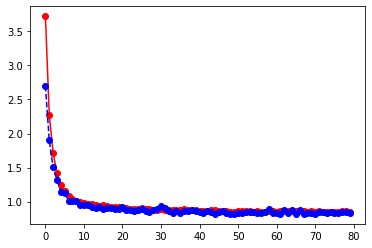

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

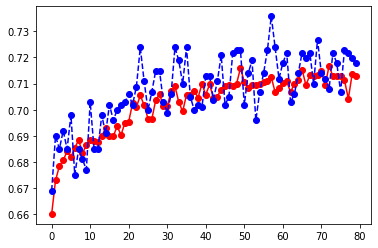

In [51]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

Confusion Matrix

In [52]:
y_pred=model.predict(X_val)
CM=np.zeros((7,7))
for i in range(7):
  for j in range(7):
    CM[i,j]=np.sum((y_pred.argmax(axis=1)==j)*(y_val.argmax(axis=1)==i))

np.set_printoptions(suppress=True)
CM

array([[  0.,  21.,   6.,   0.,   0.,   6.,   0.],
       [  0.,  31.,   2.,   0.,   0.,  19.,   0.],
       [  0.,  20.,  35.,   0.,   0.,  55.,   0.],
       [  0.,   8.,   0.,   0.,   0.,   4.,   0.],
       [  0.,   2.,  16.,   0.,   3.,  89.,   1.],
       [  0.,  10.,  13.,   0.,   2., 644.,   2.],
       [  0.,   4.,   0.,   0.,   1.,   2.,   7.]])

In [53]:
np.sum(y_val,axis=0)

array([ 33.,  52., 110.,  12., 111., 671.,  14.], dtype=float32)

In [55]:
for i in range(7):
    true_positive = np.sum((y_pred.argmax(axis=1) == i) * (y_val.argmax(axis=1) == i))
    true_negative = np.sum((y_pred.argmax(axis=1) != i) * (y_val.argmax(axis=1) != i))
    false_positive = np.sum((y_pred.argmax(axis=1) == i) * (y_val.argmax(axis=1) != i))
    false_negative = np.sum((y_pred.argmax(axis=1) != i) * (y_val.argmax(axis=1) == i))

    acc = (true_positive + true_negative) / (X_val.shape[0]) * 100
    precision = true_positive / (true_positive + false_positive) * 100
    recall = true_positive / (true_positive + false_negative) * 100

    print('on label {}, acc={:0.2f}, precision={:0.2f}, recall={:0.2f}'.format(i, acc, precision, recall))

on label 0, acc=96.71, precision=nan, recall=0.00
on label 1, acc=91.43, precision=32.29, recall=59.62
on label 2, acc=88.83, precision=48.61, recall=31.82
on label 3, acc=98.80, precision=nan, recall=0.00
on label 4, acc=88.93, precision=50.00, recall=2.70
on label 5, acc=79.86, precision=78.63, recall=95.98
on label 6, acc=99.00, precision=70.00, recall=50.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
